## Importing libraries

In [ ]:
#importing the basic libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import missingno as mano

from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

## Importing data set and getting to know it

In [ ]:
df = pd.read_excel("video_game_sales(dirty dataset).xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16620 non-null  int64  
 1   Name          16620 non-null  object 
 2   platform      16620 non-null  object 
 3   Year          16344 non-null  float64
 4   Genre         16620 non-null  object 
 5   publisher     16559 non-null  object 
 6   NA Sales      16618 non-null  float64
 7   EU_Sales      16618 non-null  float64
 8   JP Salesss    16617 non-null  float64
 9   Other_Sales   16618 non-null  float64
 10  gloBal sales  16609 non-null  float64
 11  Total sales   0 non-null      float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
df.shape

(16620, 12)

<AxesSubplot:>

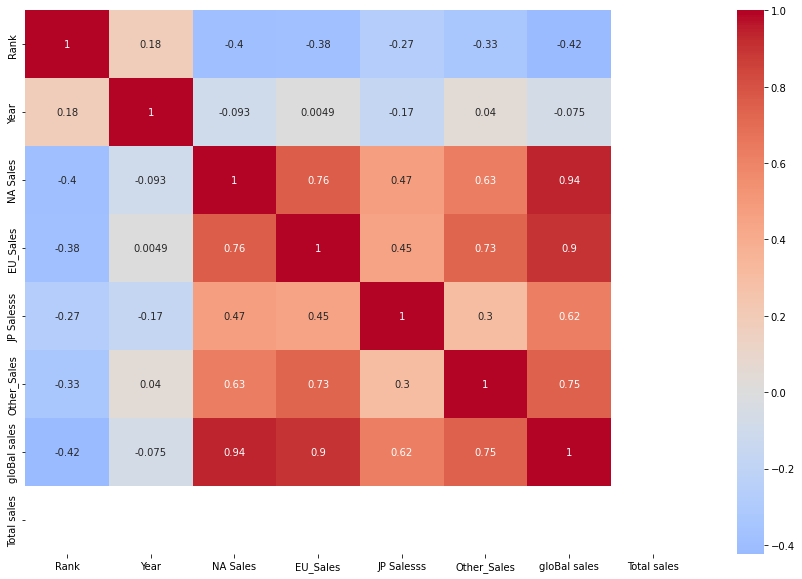

In [ ]:
plt.figure(figsize=(15,10)) 
sns.color_palette(as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center = 0)

## Missing value analysis

We are categorizing the dataset upon MCAR, MAR, MNAR

We are plotting graphs of the missing value data

After analysis we will handle missing values

In [ ]:
#Display Missing Values by numbers    
df.isnull().sum()

Rank                0
Name                0
platform            0
Year              276
Genre               0
publisher          61
NA Sales            2
EU_Sales            2
JP Salesss          3
Other_Sales         2
gloBal sales       11
Total sales     16620
dtype: int64

In [ ]:
#Display Missing Values by Percentage    
df.isna().sum()/df.shape[0] * 100


Rank              0.000000
Name              0.000000
platform          0.000000
Year              1.660650
Genre             0.000000
publisher         0.367028
NA Sales          0.012034
EU_Sales          0.012034
JP Salesss        0.018051
Other_Sales       0.012034
gloBal sales      0.066185
Total sales     100.000000
dtype: float64

we see that total_ales column has 100% missing values and after that, year and publishing has most missing value of respective percentages of 1.7% and 0.36%

<AxesSubplot:>

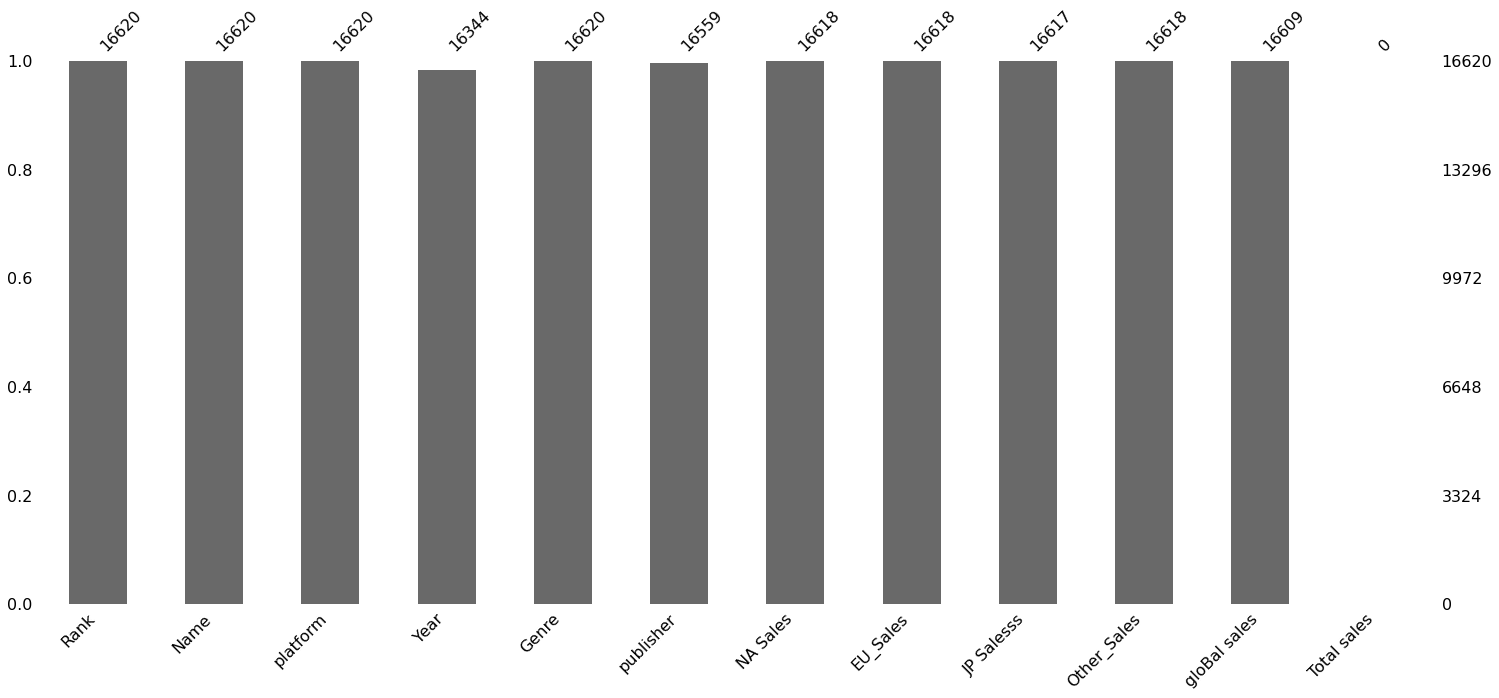

In [ ]:
mano.bar(df)

Missing value barplot displays the total non null value in each column

<AxesSubplot:>

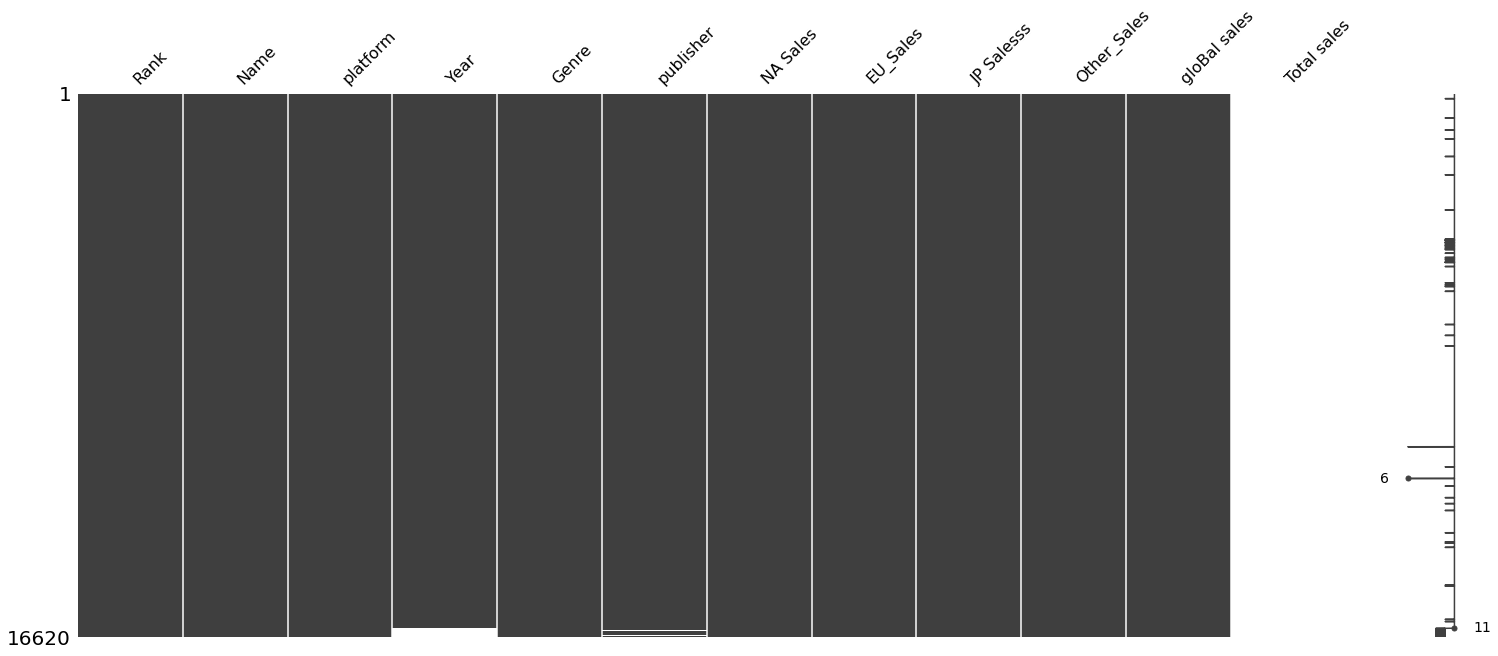

In [ ]:
mano.matrix(df.sort_values(by='Year'))

Missing value matrix shows that there isnt any relationship or pattern that can be identified in missing values even by sorting by year. There are few values thatof publisher that are missing along with year values in same row but not a prominent relationship, We will further see heatmap to clearify

<AxesSubplot:>

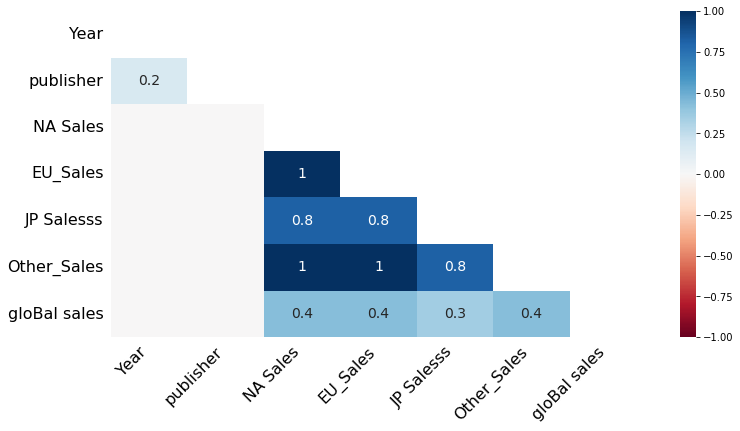

In [ ]:
#plot the heatmap to determine the relationship (correlation) between missingness of columns
mano.heatmap(df, figsize=(12,6))

Here we can see that there is minor positive correlation of publisher and year missing values of 0.2

Also we observe that all sales column missing values have a very high correlation between them, we can say that this maybe missing at random type of missing values 

<AxesSubplot:>

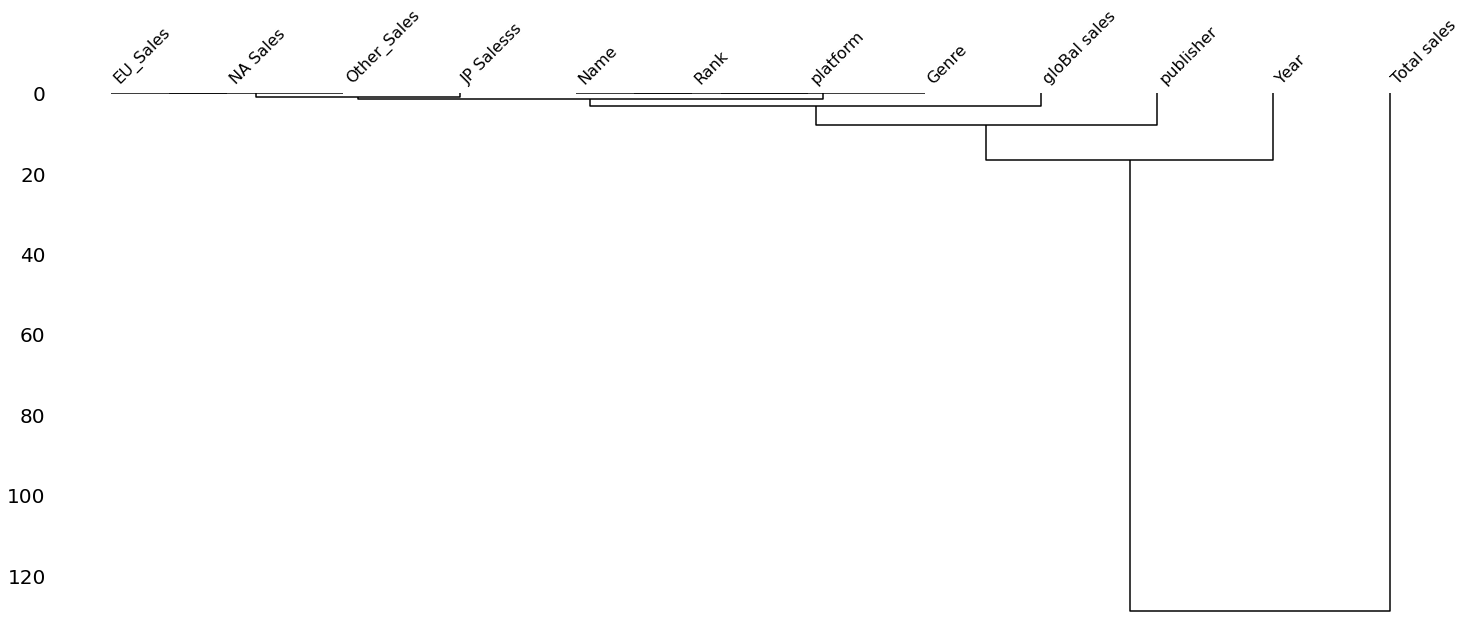

In [ ]:
#dendogram will quantify and cluster the missingness
mano.dendrogram(df)

Summary:

We see that total sales column has 0 entries. 

NA_sales, EU_sales, Other_sales and Jp_sales have very low number of missing values

Year 1.3 % missing values, and publisher has 0.37 % missing values

Global sales also have very minimal missing values

We could not find any relation between missing value columns as they are very small, although we observe that that all sales columns missing values in heatmap have high correlation with each other

## Inconsistant Data Handling

Strategy:

First of all we will remove duplicate rows to make our data consistent

Then we will try to find any inconsistencies in our categorical variablesa apart from name because its not category type variable; platform, genre, publisher and Year(we are treating year as categorical)

Afterwards we will remove these inconsistencies and then finaly we will fix datatypes of our variables

We are dropping exact duplicate rows

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(16599, 12)

Now we are finding the unique values in the 4 categorical.

In [ ]:
print(df['Year'].unique())

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000.   nan 1995. 2016. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]


In [ ]:
print(df['Genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [ ]:
print(df['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' 2600 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


We have analyzed the values in the platform variable that there is a value 2600, which basically refers to the platform "Atari", so below are all the publisher of the said platform

In [ ]:
df2= df.loc[df['platform'] == 2600, ['publisher'] ]
print(df2['publisher'].unique())

['Atari' 'Activision' 'Parker Bros.' 'Imagic' 'Coleco' 'Quelle' 'Mystique'
 '20th Century Fox Video Games' 'Men-A-Vision' 'Tigervision'
 'Mattel Interactive' 'Universal Gamex' 'Wizard Video Games'
 'CPG Products' 'Answer Software' 'Ultravision' 'Sega' 'Data Age'
 'ITT Family Games' 'Starpath Corp.' 'CBS Electronics' 'Unknown' 'Taito'
 'Bomb' 'Sears' 'Avalon Interactive']


Converting each value to string

In [ ]:
df['platform'] = df['platform'].apply(lambda x: str(x))

Fixing datatype, changing the datatype of the variable 'Year' to string(object) from float, for the better analysis.

In [ ]:
df['Year'] = df['Year'].fillna('missvalue')
df['Year'] = df['Year'].apply(lambda x: str(x)[:4])


In [ ]:
df.head()

,Rank,Name,platform,Year,Genre,publisher,NA Sales,EU_Sales,JP Salesss,Other_Sales,gloBal sales,Total sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,NaN
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,NaN
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,NaN
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16599 entries, 0 to 16619
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16599 non-null  int64  
 1   Name          16599 non-null  object 
 2   platform      16599 non-null  object 
 3   Year          16599 non-null  object 
 4   Genre         16599 non-null  object 
 5   publisher     16538 non-null  object 
 6   NA Sales      16597 non-null  float64
 7   EU_Sales      16597 non-null  float64
 8   JP Salesss    16596 non-null  float64
 9   Other_Sales   16597 non-null  float64
 10  gloBal sales  16588 non-null  float64
 11  Total sales   0 non-null      float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


Summary:

We have removed duplicated rows.

we have then analyzed the categorical variables and there is not any inconsistency in it.

Finally, we fixed the datatype of the variable 'Year' to datetime64.

## Missing value handling

Strategy:

Now based on analysis we will remove or impute missing values

Removing total_sales column as it is an empty column, the purpose of total_sales column would be sum of all other columns of which we already have a column global_sales (its is the sum of all other columns). Hence makes sense to drop this redundant and empty column

In [ ]:
df = df.drop(['Total sales'], axis=1)

Removing null sales values of NA, JP, others and EU as there percentage is very small

In [ ]:
df = df.dropna(subset=['EU_Sales','JP Salesss','NA Sales','Other_Sales'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16596 entries, 0 to 16619
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16596 non-null  int64  
 1   Name          16596 non-null  object 
 2   platform      16596 non-null  object 
 3   Year          16596 non-null  object 
 4   Genre         16596 non-null  object 
 5   publisher     16535 non-null  object 
 6   NA Sales      16596 non-null  float64
 7   EU_Sales      16596 non-null  float64
 8   JP Salesss    16596 non-null  float64
 9   Other_Sales   16596 non-null  float64
 10  gloBal sales  16587 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


We identified with background check and by observing data that global sales is sum of all other sales hence we are imputing it by sum of all sales column 

In [ ]:
df['gloBal sales'] = df.apply(lambda row: row['EU_Sales'] + row['JP Salesss'] + row['NA Sales']+ row['Other_Sales'] if pd.isnull(row['gloBal sales']) else row['gloBal sales'], axis=1)

In [ ]:
df.tail()

,Rank,Name,platform,Year,Genre,publisher,NA Sales,EU_Sales,JP Salesss,Other_Sales,gloBal sales
16615,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16616,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16617,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16618,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16619,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


Handling publisher missing values by grouping on genre and platform,

This approach assumes that games with the same platform and genre are likely to have the same publisher, hence imputating based on this by grouping by

In [ ]:
df['publisher'] = df.groupby(['platform', 'Genre'])['publisher'].apply(lambda x: x.fillna(x.mode().iloc[0]))


Handling missing values of year, 

we are imputatating mode value of year by grouping on publisher, defining impute_year function and before that grouping by publisher and getting mode value for that publisher. (We get two mode values we pick the latest year (max) value) 

In [ ]:
df['Year'] = df['Year'].apply(lambda x: np.nan if x == 'miss' else x)
df_year_not_null = df.dropna(subset=['Year'])
modes = df_year_not_null.groupby('publisher')['Year'].apply(lambda x: x.value_counts().idxmax())

modes = pd.DataFrame(modes)
modes = modes.reset_index()

print(modes.info())

# Define a lambda function to replace missing values with mode values
def impute_year(row):
    if pd.isnull(row['Year']):
        
        publisher = str(row['publisher'])
        mode_year = modes.loc[modes['publisher']==(publisher),['Year']].reset_index(drop=True)
        if mode_year.empty:
          year = '0000'
        else:
          year = str(mode_year.iloc[0,0])

        return year
    else:
        
        return row['Year']

# Apply the lambda function to the 'Year' column
df['Year'] = df.apply(impute_year, axis=1)

df = df.drop(index=df[df['Year'] == '0000'].index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   publisher  576 non-null    object
 1   Year       576 non-null    object
dtypes: object(2)
memory usage: 9.1+ KB
None


In [ ]:
df.isnull().sum()

Rank            0
Name            0
platform        0
Year            0
Genre           0
publisher       0
NA Sales        0
EU_Sales        0
JP Salesss      0
Other_Sales     0
gloBal sales    0
dtype: int64

Output cleaned file

In [ ]:
df.to_excel("video_game_sales(cleaned dataset).xlsx")

# Univariate descriptive statistics

Strategy

We will do outlier analysis, normality testing and plot histograms for numerical columns

Afterwards we will focus on year and important categorical columns for analysis

We will checking the normality of the variables by the function containing K2, shapiro and Kolmogorov-Smimov Test.

In [ ]:
def check_normality(data):
    k2_stat, k2_pval = normaltest(data)
    k2_normal = k2_pval >= 0.05
    
    # Check normality using Shapiro-Wilk test
    sw_stat, sw_pval = shapiro(data)
    sw_normal = sw_pval >= 0.05
    
    # Check normality using Kolmogorov-Smirnov test
    ad_stat, ad_critical_values, ad_significance_level = anderson(data, dist='norm')
    ad_normal = ad_stat < ad_critical_values[2]
    
    # Return True if all tests indicate normality, False otherwise
    return k2_normal and sw_normal and ad_normal

##North America Sales Analysis

In [ ]:
if check_normality(df['NA Sales']):
    print("The column is normally distributed.")
else:
    print("The column is not normally distributed.")

The column is not normally distributed.


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
df['NA Sales'].describe()

count    16594.000000
mean         0.264473
std          0.817453
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA Sales, dtype: float64

<AxesSubplot:>

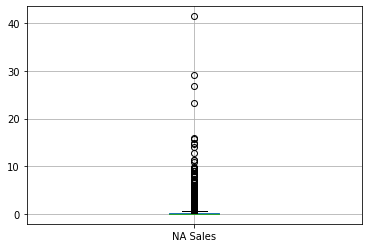

In [ ]:
df.boxplot(column='NA Sales', return_type='axes')

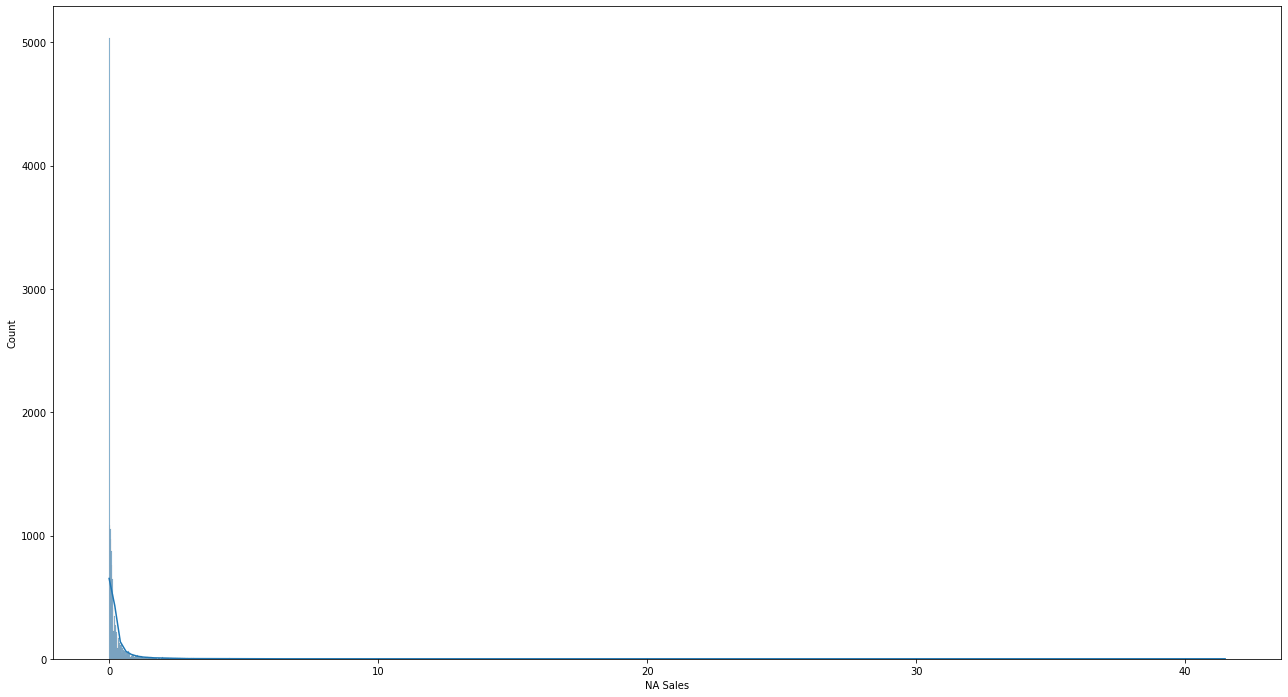

In [ ]:
plt.figure(figsize=(22,12))
sns.histplot(df['NA Sales'], kde=True)
plt.show()

Analysis 'NA Sales':

As from the above analysis we can see that the column is not normally distributed. As the mean value is 0.268943 while the max value is 41.49, so we can clearly see in the boxplot and histogram that are there are mainly outlier values.

##Europe Sales Analysis

In [ ]:
if check_normality(df['EU_Sales']):
    print("The column is normally distributed.")
else:
    print("The column is not normally distributed.")

The column is not normally distributed.


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
df['EU_Sales'].describe()

count    16594.000000
mean         0.146154
std          0.503241
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64

<AxesSubplot:>

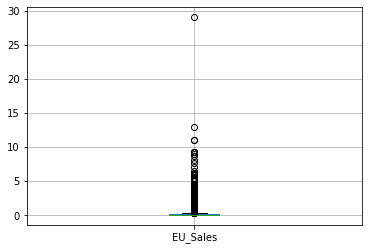

In [ ]:
df.boxplot(column='EU_Sales', return_type='axes')

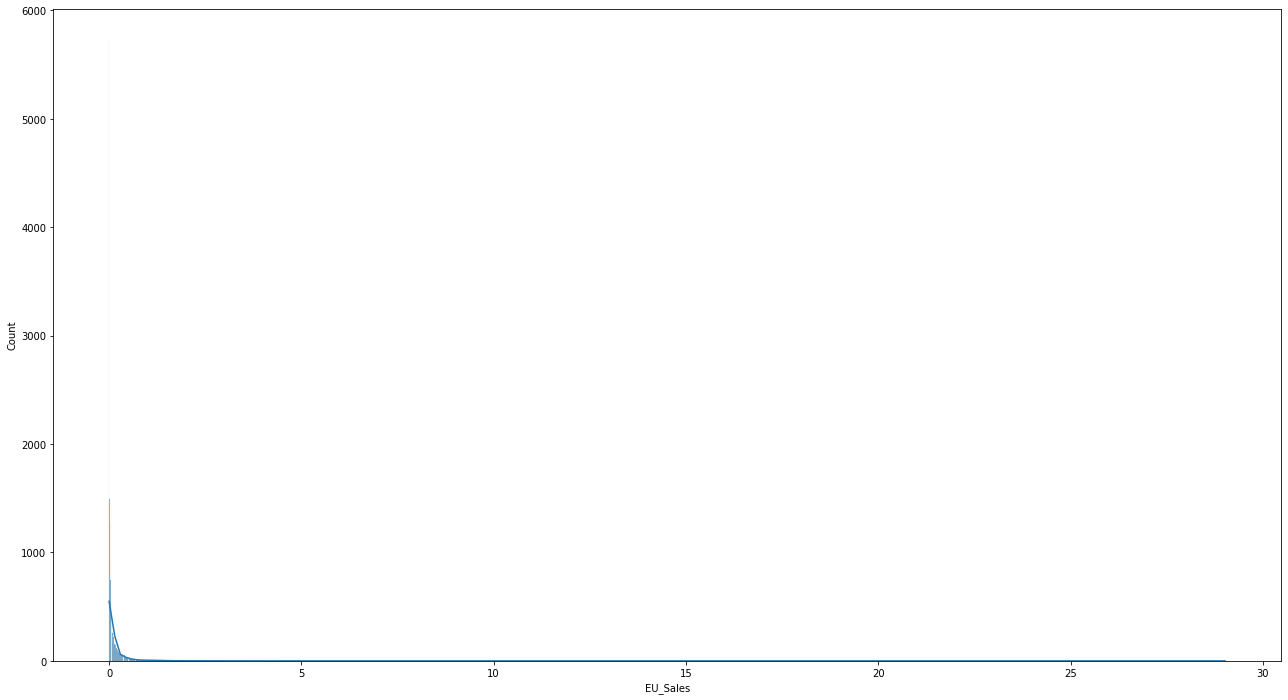

In [ ]:
plt.figure(figsize=(22,12))
sns.histplot(df['EU_Sales'], kde=True)
plt.show()

Analysis 'EU_Sales':

As from the above analysis we can see that the column is not normally distributed. As the mean value is 0.1481 while the max value is 29.02, so we can clearly see in the boxplot and histogram that are there are mainly outlier values.


##Japan Sales Analysis

In [ ]:
if check_normality(df['JP Salesss']):
    print("The column is normally distributed.")
else:
    print("The column is not normally distributed.")

The column is not normally distributed.


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
df['JP Salesss'].describe()

count    16594.000000
mean         0.077588
std          0.308708
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP Salesss, dtype: float64

<AxesSubplot:>

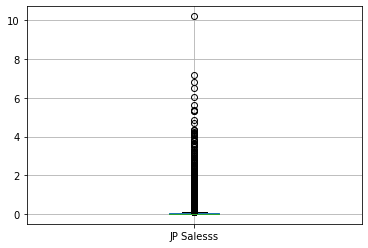

In [ ]:
df.boxplot(column='JP Salesss', return_type='axes')

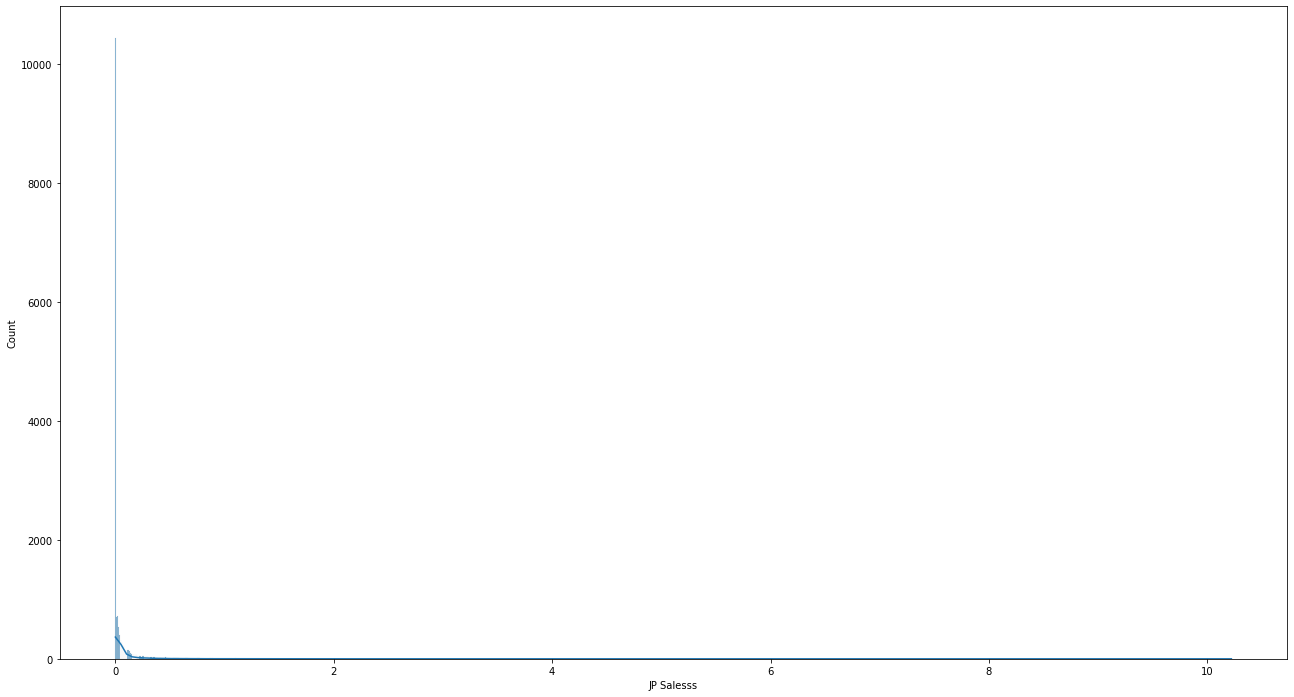

In [ ]:

plt.figure(figsize=(22,12))
sns.histplot(df['JP Salesss'], kde=True)
plt.show()

Analysis 'JP Salesss':

As from the above analysis we can see that the column is not normally distributed. As the mean value is 0.079 while the max value is 10.22, so we can clearly see in the boxplot and histogram that are there are mainly outlier values.

##Others Sales Analysis

In [ ]:
if check_normality(df['Other_Sales']):
    print("The column is normally distributed.")
else:
    print("The column is not normally distributed.")

The column is not normally distributed.


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
df['Other_Sales'].describe()

count    16594.000000
mean         0.047884
std          0.187684
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64

<AxesSubplot:>

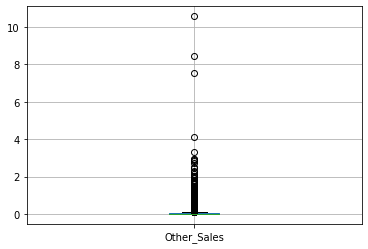

In [ ]:
df.boxplot(column='Other_Sales', return_type='axes')

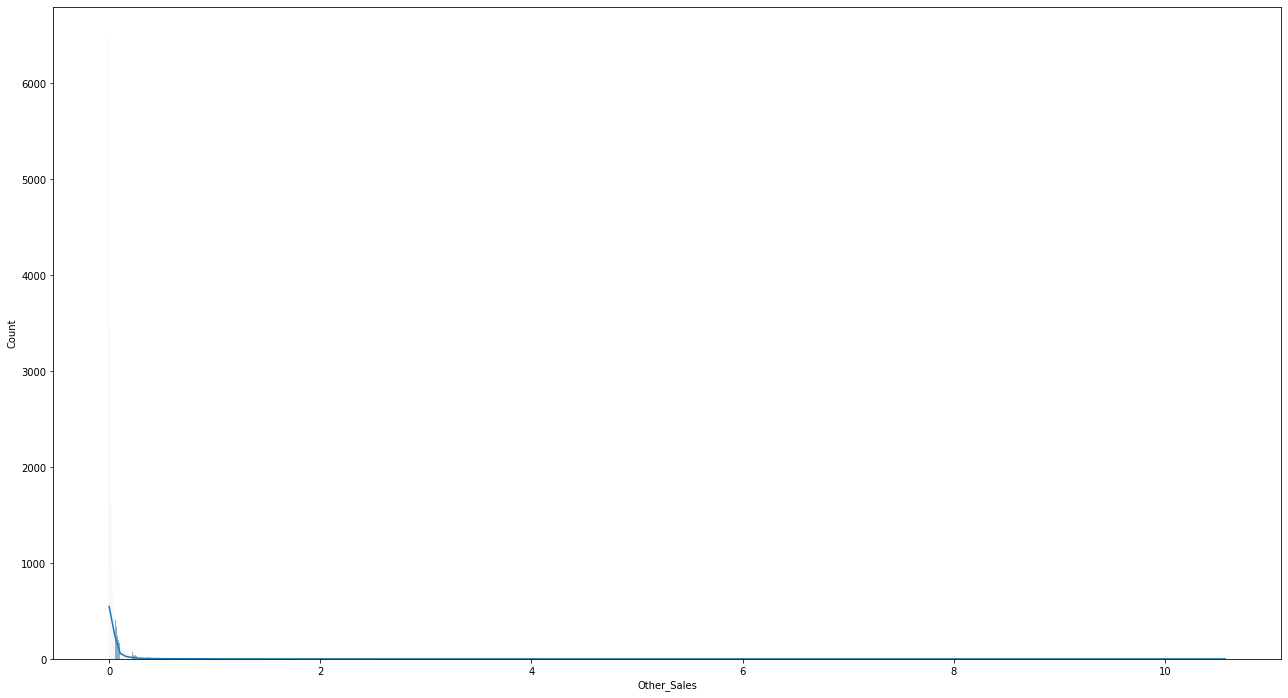

In [ ]:

plt.figure(figsize=(22,12))
sns.histplot(df['Other_Sales'], kde=True)
plt.show()

Analysis 'Other_Sales':

As from the above analysis we can see that the column is not normally distributed. As the mean value is 0.048446 while the max value is 10.57, so we can clearly see in the boxplot and histogram that are there are mainly outlier values.

##Global Sales Analysis

In [ ]:
if check_normality(df['gloBal sales']):
    print("The column is normally distributed.")
else:
    print("The column is not normally distributed.")

The column is not normally distributed.


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
df['gloBal sales'].describe()

count    16594.000000
mean         0.536375
std          1.552111
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: gloBal sales, dtype: float64

<AxesSubplot:>

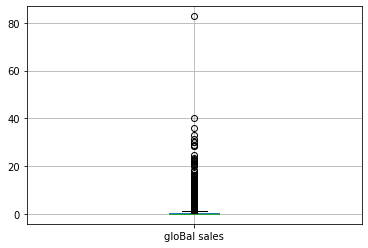

In [ ]:
df.boxplot(column='gloBal sales', return_type='axes')

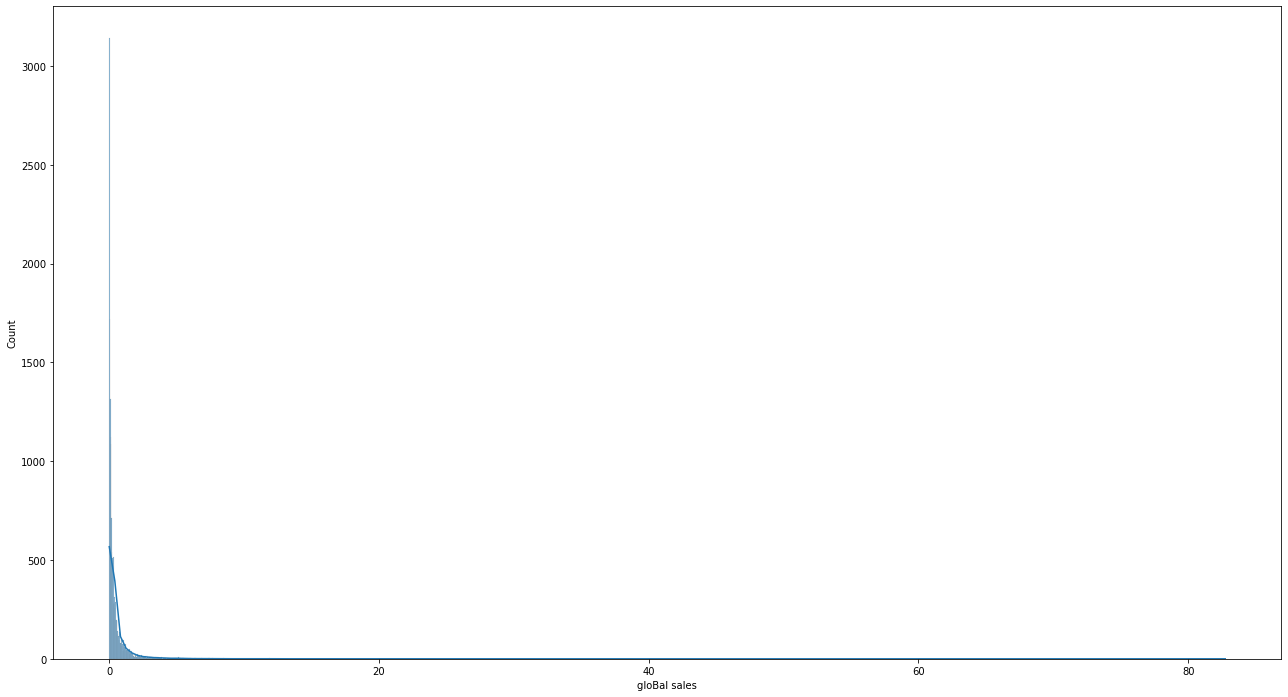

In [ ]:

plt.figure(figsize=(22,12))
sns.histplot(df['gloBal sales'], kde=True)
plt.show()

Analysis 'gloBal sales':

As from the above analysis we can see that the column is not normally distributed. As the mean value is 0.538748 while the max value is 82.47, so we can clearly see in the boxplot and histogram that are there are mainly outlier values.

## Analysis on 'Year' variable to find any kind of anomalies in data.

In [ ]:
df.head()

,Rank,Name,platform,Year,Genre,publisher,NA Sales,EU_Sales,JP Salesss,Other_Sales,gloBal sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


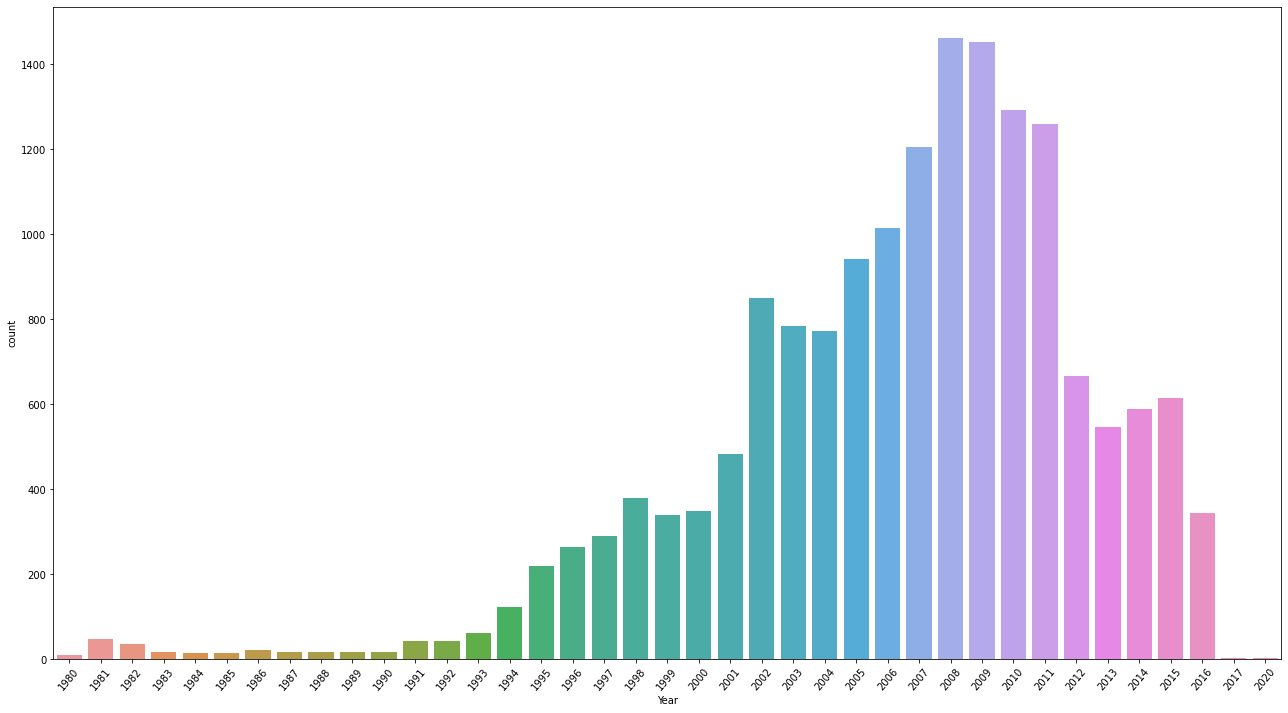

In [ ]:
df_year_sort = df.sort_values(by='Year', ascending=True)
plt.figure(figsize=(22,12))
sns.countplot(data=df_year_sort,x='Year')
plt.xticks(rotation=50)
plt.show()

We observe from Year graph that as years passed game per year ratio was increasing at a rate anf then after 2008 we saw a steady decline in development of new games by publishers 

## Analysis on potential categorical variables

1- Platform

2- Genre

In [ ]:
df['platform'].describe()

count     16594
unique       31
top          DS
freq       2163
Name: platform, dtype: object

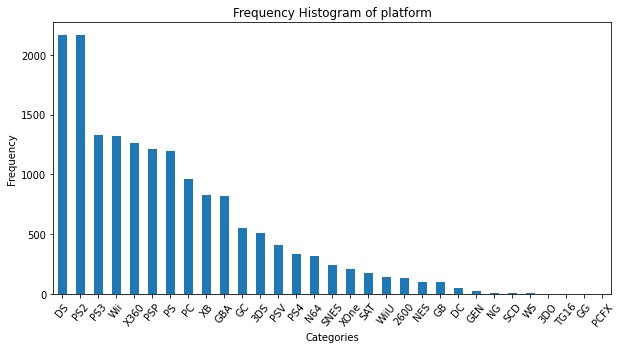

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
df['platform'].value_counts().plot(kind='bar', ax=ax)
ax.set_title('Frequency Histogram of ' + 'platform')
ax.set_xlabel('Categories')
ax.set_ylabel('Frequency')
plt.xticks(rotation=50)
plt.show()



Analysis on 'Platform':

The 2 top categories with the highest count are the DS and PS2 as shown in the histogram.

In [ ]:
df['Genre'].describe()

count      16594
unique        12
top       Action
freq        3316
Name: Genre, dtype: object

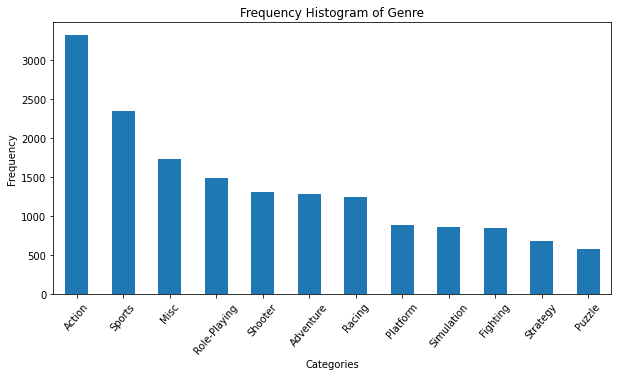

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
df['Genre'].value_counts().plot(kind='bar', ax=ax)
ax.set_title('Frequency Histogram of ' + 'Genre')
ax.set_xlabel('Categories')
ax.set_ylabel('Frequency')
plt.xticks(rotation=50)
plt.show()

Analysis on 'Genre':

The top 2 categories with the highest count are the Action, Sports as shown in the histogram.

## Summary

We have started from the normality test of 5 numerical analysis containing k2 test, shapiro wilk test and anderson, and then we created boxplot and histogram to give a clear view of data.

After we gave analysis on 'Year' variable by creating a line graph.

Then we gave a comprehensive analysis on 2 potential categorical variable with frequency histogram.

#Bivariate Statistic Analysis

Strategy is to find correlation between numerical and categorical columns that will later help in analysis

First strategy is to convert all columns to numerical, converting categorical column by label encoding it

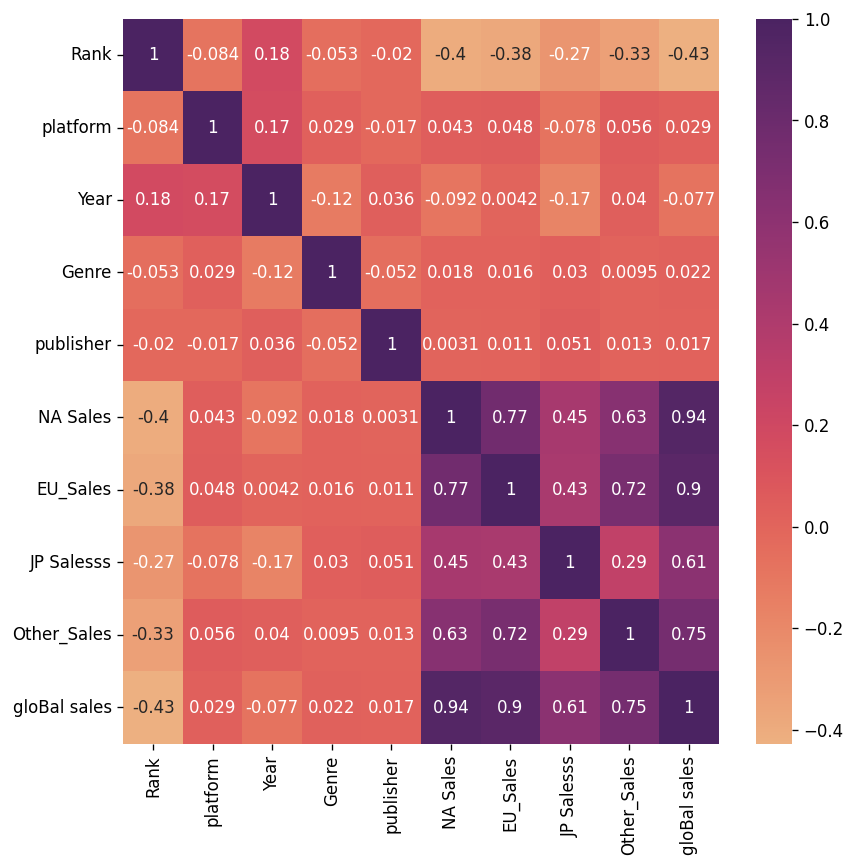

In [ ]:

# Encode selected categorical columns to prepare for heatmap plotting
en = df.copy()
encoder = LabelEncoder()
en[["platform", "Genre", "publisher","Year"]] = en[["platform", "Genre", "publisher","Year"]].apply(encoder.fit_transform)

# Create correlation heatmap
plt.figure(figsize=(8, 8), dpi=120)
sns.heatmap(en.corr(), cmap="flare", annot=True)
plt.show()

We observe from heatmap that all sales column have a good correlation with each other none with the categorical columns.


## Categorical variable tests with each other using chi square test

Chi-square test on genre and platform categorical variables

In [ ]:
# Create a contingency table of the two variables
contingency_table = pd.crosstab(df['platform'], df['Genre'])

# Perform the chi-square test
stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(p_value)

0.0


As p-value is less than 0.05, we reject null hypothesis, it implies that platform and Genre have dependency between them

Chi-square test on platform and publisher categorical variables

In [ ]:
# Create a contingency table of the two variables
contingency_table = pd.crosstab(df['platform'], df['publisher'])

# Perform the chi-square test
stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(p_value)

0.0


As p-value is less than 0.05, we reject null hypothesis, it implies that platform and publisher have dependenct between them

Chi-square test on genre and publisher categorical variables

In [ ]:
# Create a contingency table of the two variables
contingency_table = pd.crosstab(df['Genre'], df['publisher'])

# Perform the chi-square test
stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(p_value)

0.0


As p-value is less than 0.05, we reject null hypothesis, it implies that publisher and Genre have dependenct between them


A low p-value indicates that there is a significant association between the two variables, while a high p-value suggests that the association may be due to chance. Hence all categorical variables are closely related to each other

## Testing correlation between numerical and categorical using ANOVA

As our numerical columns are not normalised hence normalising them for ANOVA test

In [ ]:
# Assuming your sales data is stored in a pandas DataFrame called 'df'
sales_columns = ['gloBal sales', 'Other_Sales', 'NA Sales', 'JP Salesss', 'EU_Sales']

# Loop through each sales column and perform Box-Cox transformation
for col in sales_columns:
    sales = df[col]
    sales_transformed =  1 / sales 
    col_name = col+'_n'
    df[col_name] = sales_transformed

Checking if columns pass all the normaility tests

In [ ]:
sales_columns = ['gloBal sales_n', 'Other_Sales_n', 'NA Sales_n', 'JP Salesss_n', 'EU_Sales_n']

# Create a new DataFrame to store the normality test results
results_df = pd.DataFrame(columns=['Column Name', 'Normality'])

# Loop through each sales column and perform normality test
for col in sales_columns:
    sales = df[col]
    normality = check_normality(sales)
    results_df = results_df.append({'Column Name': col, 'Normality': normality}, ignore_index=True)

# Print the results table
print(results_df)

      Column Name Normality
0  gloBal sales_n     False
1   Other_Sales_n     False
2      NA Sales_n     False
3    JP Salesss_n     False
4      EU_Sales_n     False


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
<ipython-input-116-cf6e621f2ae4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Column Name': col, 'Normality': normality}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1182: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1948: RuntimeWarning: invalid value encountered in subtract
  w = (y - xbar) / s
/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infra

We tried 4 types of transformation to make it normal; inverse, logarthimic, Box-Cox and Yeo-Johnson transformations but still couldnt get normality in our numerical columns, as we see we are still getting false on our numerical columns. Hence we will perform anova with what we have maybe it may benefit us in some sense 

In [ ]:
# Perform ANOVA tests for each sales column against each categorical column
results = []
for col in ['platform', 'publisher', 'Genre']:
    for sales_col in ['gloBal sales', 'Other_Sales', 'NA Sales', 'JP Salesss', 'EU_Sales']:
        # Extract the groups
        groups = []
        for group_name in df[col].unique():
            group = df[df[col] == group_name][sales_col]
            groups.append(group)

        # Perform the ANOVA test
        f, p = stats.f_oneway(*groups)

        # Save the results
        results.append({'Sales': sales_col, 'Categorical': col, 'F': f, 'p-value': p})

# Create a table to show the results
results_df = pd.DataFrame(results)
results_df = results_df.pivot(index='Sales', columns='Categorical', values=['F', 'p-value'])
results_df.columns = results_df.columns.map('_'.join)
results_df = results_df.round({'F_platform': 2, 'F_publisher': 2, 'F_Genre': 2, 'p-value_platform': 2, 'p-value_publisher': 2, 'p-value_Genre': 2})

print(results_df)

              F_Genre  F_platform  F_publisher  p-value_Genre  \
Sales                                                           
EU_Sales        14.53       13.11         2.23            0.0   
JP Salesss      52.25       88.78         8.12            0.0   
NA Sales        22.73       22.13         3.03            0.0   
Other_Sales     12.52       17.59         1.39            0.0   
gloBal sales    18.00       20.78         3.39            0.0   

              p-value_platform  p-value_publisher  
Sales                                              
EU_Sales                   0.0                0.0  
JP Salesss                 0.0                0.0  
NA Sales                   0.0                0.0  
Other_Sales                0.0                0.0  
gloBal sales               0.0                0.0  


We observe from output that all sales column have less than 0.05 p-value with all categorical columns, hence we reject null hypothesis. It implies that mean values across each group of categorical column are not equal.

##Tukey test with global sales as it is sum of all other sales

In [ ]:
# Perform the Tukey's test for each categorical variable
tukey_platform = sm.stats.multicomp.pairwise_tukeyhsd(df['gloBal sales'], df['platform'])

# Print the results
print('Tukey test results for platform:\n', tukey_platform)

/usr/local/lib/python3.9/dist-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Tukey test results for platform:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  2600    3DO  -0.7025    1.0 -4.0557  2.6506  False
  2600    3DS  -0.2681 0.9965 -0.8308  0.2946  False
  2600     DC  -0.4288 0.9983   -1.37  0.5124  False
  2600     DS  -0.3556 0.7303 -0.8723  0.1611  False
  2600     GB   1.8708    0.0  1.1038  2.6377   True
  2600    GBA  -0.3484 0.8398 -0.8886  0.1918  False
  2600     GC  -0.3773 0.7625  -0.935  0.1804  False
  2600    GEN   0.3145    1.0 -0.8992  1.5282  False
  2600     GG  -0.6959    1.0 -6.4602  5.0685  False
  2600    N64  -0.0497    1.0 -0.6456  0.5462  False
  2600    NES   1.8261    0.0  1.0591   2.593   True
  2600     NG  -0.6159    1.0 -2.3479  1.1161  False
  2600     PC  -0.4663 0.2117 -1.0011  0.0686  False
  2600   PCFX  -0.7059    1.0 -6.4702  5.0585  False
  2600     PS   -0.125    1.0 -0.6534  0.4035  False
  2600    PS

We perform tukey test on global sales (as it is sum of all sales) and platform, groups that has true means that there difference is significant

In [ ]:
tukey_genre = sm.stats.multicomp.pairwise_tukeyhsd(df['gloBal sales'], df['Genre'])
print('Tukey test results for genre:\n', tukey_genre)

Tukey test results for genre:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
      Action    Adventure  -0.3422    0.0 -0.5079 -0.1765   True
      Action     Fighting   0.0013    1.0 -0.1929  0.1956  False
      Action         Misc  -0.0623 0.9701 -0.2117   0.087  False
      Action     Platform   0.4002    0.0  0.2093  0.5911   True
      Action       Puzzle  -0.1069 0.9297 -0.3337    0.12  False
      Action       Racing   0.0498 0.9982 -0.1177  0.2174  False
      Action Role-Playing   0.0951 0.7105 -0.0623  0.2525  False
      Action      Shooter   0.2649    0.0  0.1003  0.4295   True
      Action   Simulation  -0.0757 0.9809 -0.2682  0.1167  False
      Action       Sports   0.0392 0.9987 -0.0969  0.1753  False
      Action     Strategy  -0.2709 0.0018 -0.4832 -0.0587   True
   Adventure     Fighting   0.3436    0.0  0.1203  0.5668  

We perform tukey test on global sales (as it is sum of all sales) and Genre, groups that has true means that there difference is significant

Summary:

First Anova tests were ran and we observed that all categorical variables have difference in means of categorical and sales columns also with low statistic value hence it is significantly important as well. Then we conducted tukey test to find which group has significant differences in means. Which can bes used for further analysis

But we need to consider this fact that we did not get psotive results for all sales columns